<a href="https://colab.research.google.com/github/ADVAIT135/CDAC/blob/main/6.%20Deep%20Learning/NLP_LAB_ASSIGNMENT_4_JULY_2025/NLP_LAB_ASSIGNMENT_4_JULY_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Name :</u> ADVAIT GURUNATH CHAVAN
# <u> Email ID:</u> advaitchavan135@gmail.com
# NLP_LAB_ASSIGNMENT_4_JULY_2025

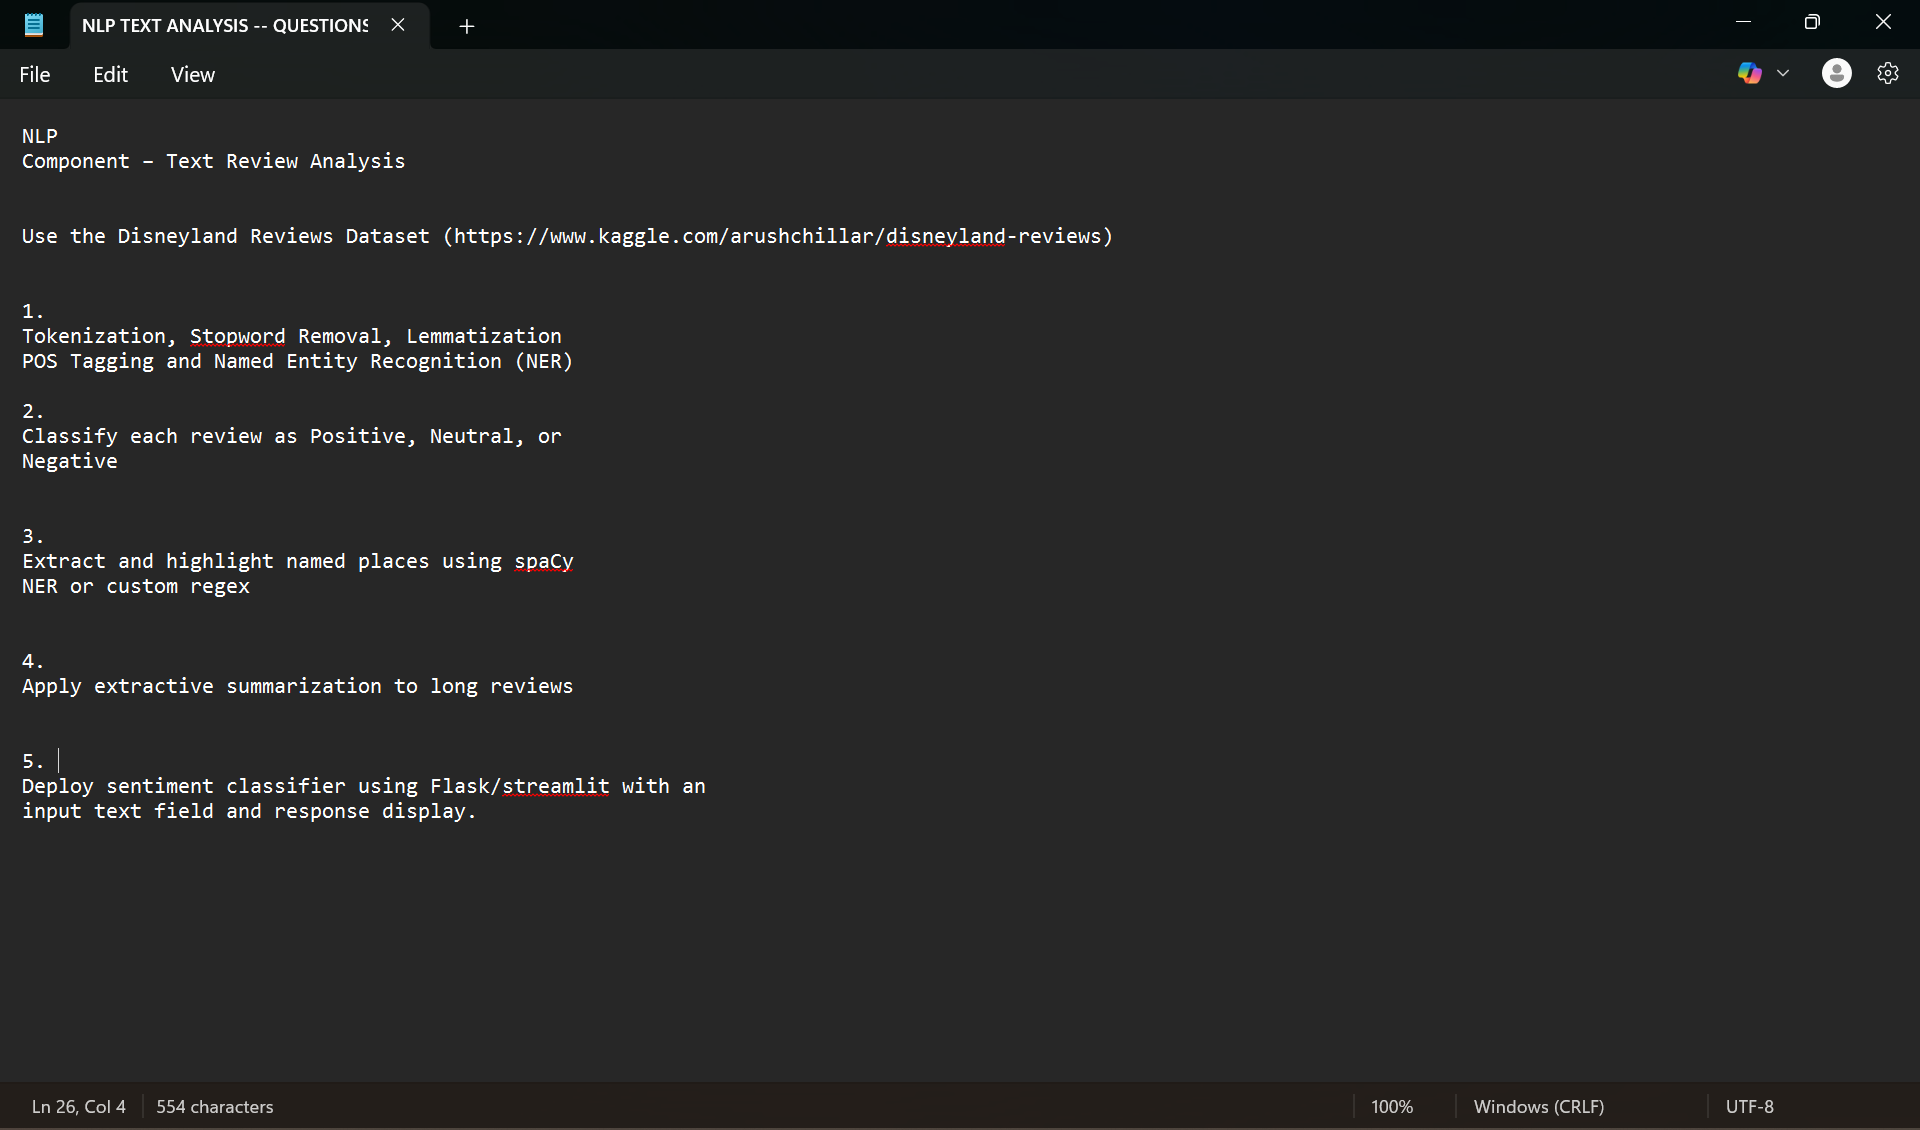

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from spacy import displacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 2. Load Dataset

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arushchillar/disneyland-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/disneyland-reviews


In [8]:
path = "/kaggle/input/disneyland-reviews/DisneylandReviews.csv"

In [9]:
df = pd.read_csv(path,encoding='latin1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## 3. Preprocessing: Tokenization, Stopword Removal, Lemmatization

In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')

def fast_preprocess(doc):
    # Get lemmas of tokens that are alphabetic, not stopwords, and not punctuation
    return ' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop])


texts = df['Review_Text'].astype(str).tolist()
clean_texts = []
for doc in nlp.pipe(texts, batch_size=100, n_process=-1):
    clean_texts.append(fast_preprocess(doc))

df['clean_text'] = clean_texts

## 4. Sentiment Classification[link text](https://)

In [12]:
def sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['Rating'].apply(sentiment)
df[['Rating', 'sentiment']].head()

,Rating,sentiment
0,4,Positive
1,4,Positive
2,4,Positive
3,4,Positive
4,4,Positive


## 5. Train/Test Split and Model

In [13]:
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
clf = LogisticRegression(max_iter=200)

In [16]:
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [17]:
y_pred = clf.predict(X_test_tfidf)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.65      0.51      0.57       720
     Neutral       0.42      0.19      0.26      1035
    Positive       0.88      0.97      0.92      6777

    accuracy                           0.84      8532
   macro avg       0.65      0.56      0.58      8532
weighted avg       0.80      0.84      0.81      8532



In [27]:
import joblib

In [28]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [29]:
joblib.dump(clf, 'classifier.pkl')

['classifier.pkl']

## 6. Named Entity Recognition: Extract and highlight named places using spaCy

In [19]:
def extract_places(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'GPE']

df['places'] = df['Review_Text'].apply(extract_places)
df[['Review_Text', 'places']].head()

,Review_Text,places
0,If you've ever been to Disneyland anywhere you...,[Hong Kong]
1,Its been a while since d last time we visit HK...,[Tomorrowland]
2,Thanks God it wasn t too hot or too humid wh...,[shade).I]
3,HK Disneyland is a great compact park. Unfortu...,[]
4,"the location is not in the city, took around 1...",[Hong Kong]


## 7. Extractive Summarization

In [22]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [23]:
def summarize(text, sent_count=2):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sent_count)
    return ' '.join([str(s) for s in summary])

In [25]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
df['summary'] = df['Review_Text'].apply(lambda x: summarize(x) if len(x.split()) > 100 else x)
df[['Review_Text', 'summary']].head()

,Review_Text,summary
0,If you've ever been to Disneyland anywhere you...,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1..."
